<a href="https://colab.research.google.com/github/ChetanAIML/Team5/blob/main/ML_FinalProject_Team5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Fundamentals Final Project
Chetan Shah, Nathan Edwards, Kayla Wright

## Importing Libraries/Dataset

In [ ]:
from google.colab import drive 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Kayla
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

In [ ]:
df=pd.read_csv("/content/drive/Shareddrives/Project/ML-Team5/diabetes_prediction_dataset.csv")

FileNotFoundError: ignored

## Sanity Checks
Checking info, unique values, fixing features, value counts, checking duplicates

In [ ]:
# Checking if dataset loaded properly
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


There are no missing values in this dataset. We have 9 columns with 100,000 rows. It does not look like any of the values have an incorrect datatype. 

In [ ]:
# Checking unique values for this dataset
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

I wanted to see the number of unique values are in the smoking history feature. I want to investigate this further. 

In [ ]:
# Creating a list for the columns that I want to investigate
columns = ['gender', 'smoking_history']
# Getting value counts
for i in columns:
  print(df[i].value_counts())
  print('*' * 25)

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64
*************************
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64
*************************


It looks like there is a value called 'ever' which in my opinion is a missclassification of 'never' so I want to fix that before going any further. 

In [ ]:
# Replacing ever to never
df.smoking_history = df.smoking_history.replace('ever', 'never')

In [ ]:
# Checking value counts once more
df.smoking_history.value_counts()

never          39099
No Info        35816
former          9352
current         9286
not current     6447
Name: smoking_history, dtype: int64

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Mean age is 41 but the lowest age is less than a year old. This must be investigated graphically. I suspect either the ages could be wrong or very young patients were considered in this study.

In [ ]:
duplicate = df[df.duplicated()]
duplicate

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [ ]:
df = df.drop_duplicates()

In [ ]:
duplicate = df[df.duplicated()]
duplicate

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


## Univariate Analysis

In [ ]:
def boxplot_histogram(data, feature, title, figsize = (12,10), kde = False, bins = None):
  
  # This function makes a boxplot and a histogram
  # data: dataframe, feature: column of dataframe, figsize: size of figure
  #kde: show curve density, bins: number of bins for the hist plot 

  # Setting up figure size, rows
  f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, sharex = True, gridspec_kw = {"height_ratios":(0.25, 0.75)}, figsize = figsize)
  # Creating boxplot
  sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, palette = "winter")
  # Creating histplot
  sns.histplot(
    data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="violet"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
  # Putting mean on histogram
  ax_hist2.axvline(data[feature].mean(), color = "black", linestyle = "--")
  plt.title(title)
  # Putting median to histogram
  ax_hist2.axvline(data[feature].median(), color = "green", linestyle = "-")

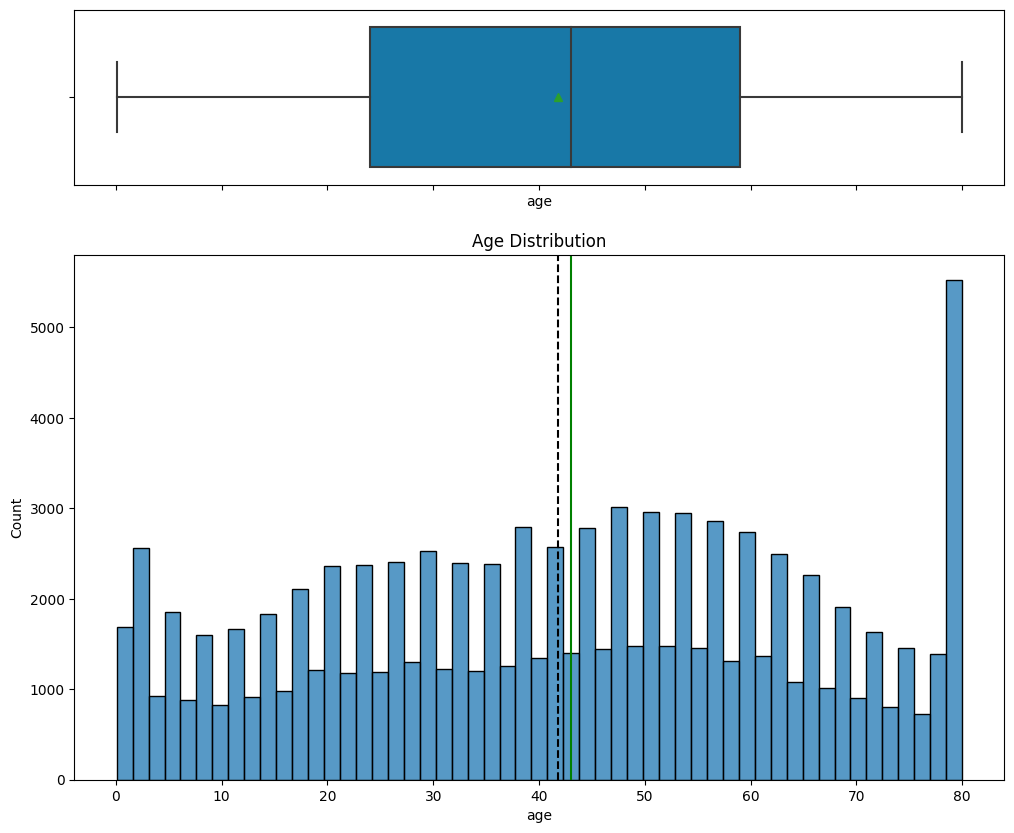

In [ ]:
boxplot_histogram(df, "age", "Age Distribution")

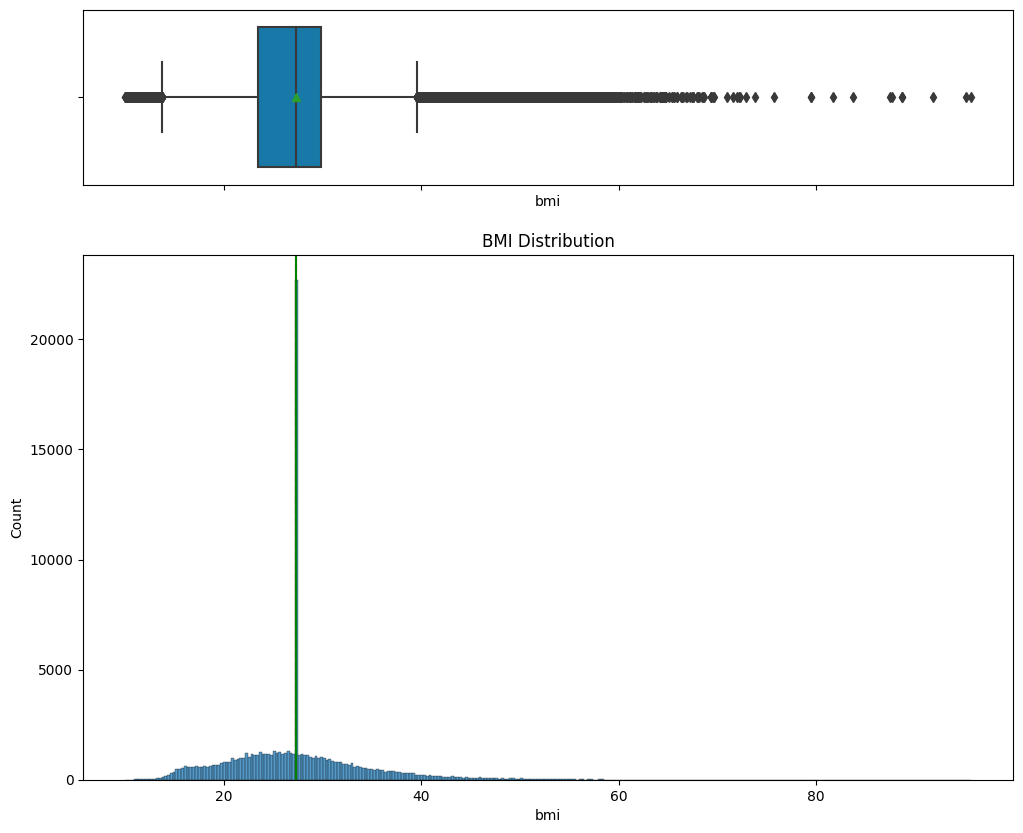

In [ ]:
boxplot_histogram(df, "bmi", "BMI Distribution")

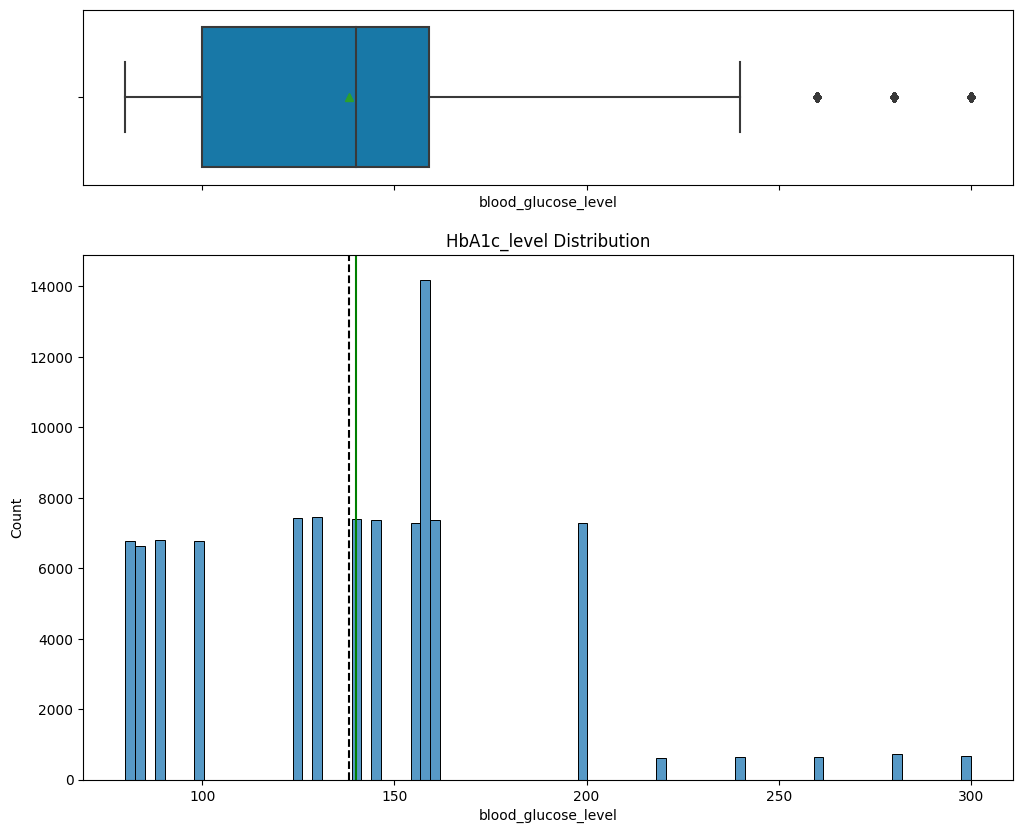

In [ ]:
boxplot_histogram(df, "blood_glucose_level", "Blood Glucose Level Distribution")

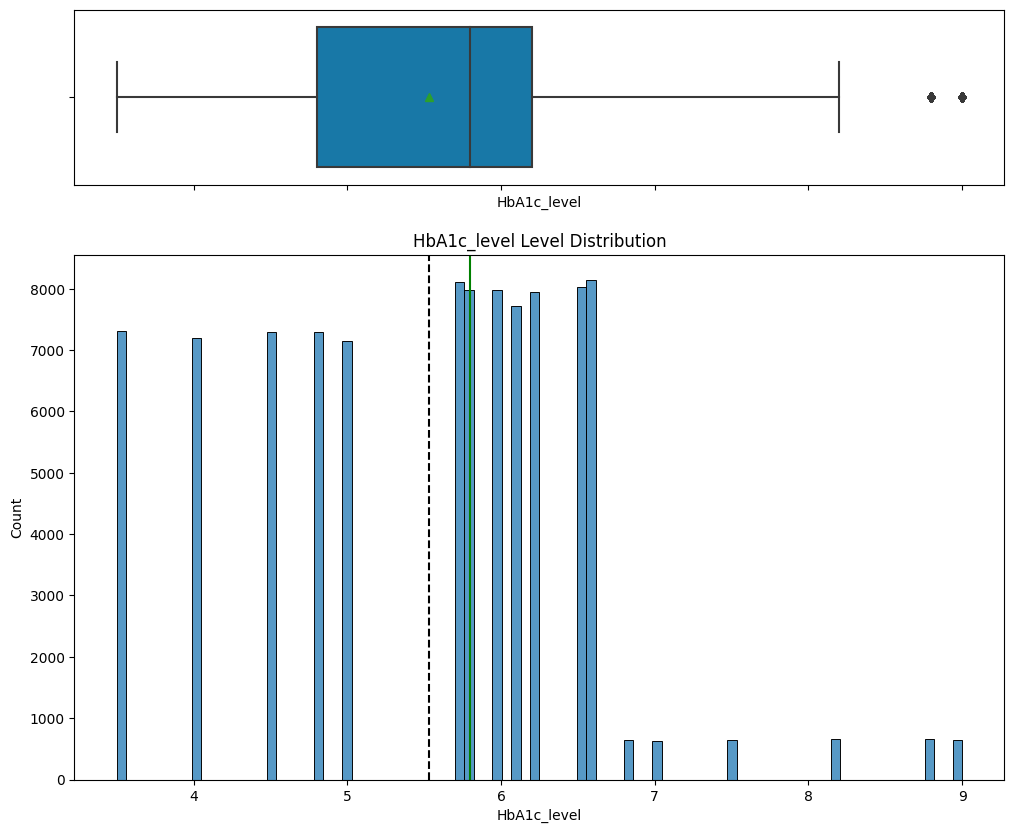

In [ ]:
boxplot_histogram(df, "HbA1c_level", "HbA1c_level Level Distribution")

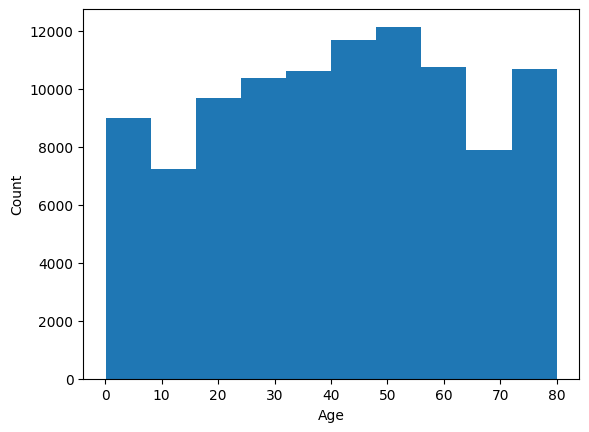

In [ ]:

plt.hist(df.age)
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()